In [1]:
###############################################################################
#this code helps to train a sequential custom model on the dataset of your interest and 
#visualize the confusion matrix, ROC and AUC curves
###############################################################################
#load the libraries
import numpy as np
import time
import import_ipynb
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import log_loss
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from evaluation import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from load_data import load_resized_training_data, load_resized_validation_data
#########################image characteristics#################################
img_rows=100 #dimensions of image
img_cols=100
channel = 3 #RGB
num_classes = 2 
batch_size = 1
num_epoch = 1
############################################################################################################################
"""configuring the customized model"""
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

#fix the optimizer
sgd = SGD(lr=0.000001, decay=1e-6, momentum=0.9, nesterov=True) #try varying this for your task and see the best fit

#compile the model
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
###############################################################################
#load data
X_train, Y_train = load_resized_training_data(img_rows, img_cols)
#print the shape of the data
print(X_train.shape, Y_train.shape)
###############################################################################
#train the model
t=time.time()
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, 
                     shuffle=True, validation_data=None)
#compute the training time
print('Training time: %s' % (time.time()-t))
###############################################################################
#predict on the validation data
X_test, Y_test = load_resized_validation_data(img_rows, img_cols)
print(X_test.shape, Y_test.shape)



Using TensorFlow backend.


importing Jupyter notebook from evaluation.ipynb
importing Jupyter notebook from load_data.ipynb
['/Users/tomndo/Git/smartphone-deep-learning/Keras-Model-Training', '//anaconda3/lib/python37.zip', '//anaconda3/lib/python3.7', '//anaconda3/lib/python3.7/lib-dynload', '', '//anaconda3/lib/python3.7/site-packages', '//anaconda3/lib/python3.7/site-packages/aeosa', '//anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/tomndo/.ipython', 'Users/tom54/Malaria_CNN']

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_____________________________________

Done: 21900/22045 images
Done: 22000/22045 images
22045
Loading done.
Transform targets to keras compatible format.
(22045, 100, 100, 3) (22045, 2)

Epoch 1/1
22045/22045 [==============================] - 206s 9ms/step - loss: 0.0049 - accuracy: 0.9998
Training time: 207.0084810256958
------------------------------
Creating validation images...
------------------------------
valid_all 5518
Done: 0/5518 images
Done: 100/5518 images
Done: 200/5518 images
Done: 300/5518 images
Done: 400/5518 images
Done: 500/5518 images
Done: 600/5518 images
Done: 700/5518 images
Done: 800/5518 images
Done: 900/5518 images
Done: 1000/5518 images
Done: 1100/5518 images
Done: 1200/5518 images
Done: 1300/5518 images
Done: 1400/5518 images
Done: 1500/5518 images
Done: 1600/5518 images
Done: 1700/5518 images
Done: 1800/5518 images
Done: 1900/5518 images
Done: 2000/5518 images
Done: 2100/5518 images
Done: 2200/5518 images
Done: 2300/5518 images
Done: 2400/5518 images
Done: 2500/5518 images
Done: 2600/5518 imag

------------------------------
Creating validation images...
------------------------------
valid_all 5518
Done: 0/5518 images
Done: 100/5518 images
Done: 200/5518 images
Done: 300/5518 images
Done: 400/5518 images
Done: 500/5518 images
Done: 600/5518 images
Done: 700/5518 images
Done: 800/5518 images
Done: 900/5518 images
Done: 1000/5518 images
Done: 1100/5518 images
Done: 1200/5518 images
Done: 1300/5518 images
Done: 1400/5518 images
Done: 1500/5518 images
Done: 1600/5518 images
Done: 1700/5518 images
Done: 1800/5518 images
Done: 1900/5518 images
Done: 2000/5518 images
Done: 2100/5518 images
Done: 2200/5518 images
Done: 2300/5518 images
Done: 2400/5518 images
Done: 2500/5518 images
Done: 2600/5518 images
Done: 2700/5518 images
Done: 2800/5518 images
Done: 2900/5518 images
Done: 3000/5518 images
Done: 3100/5518 images
Done: 3200/5518 images
Done: 3300/5518 images
Done: 3400/5518 images
Done: 3500/5518 images
Done: 3600/5518 images
Done: 3700/5518 images
Done: 3800/5518 images
Done: 39

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


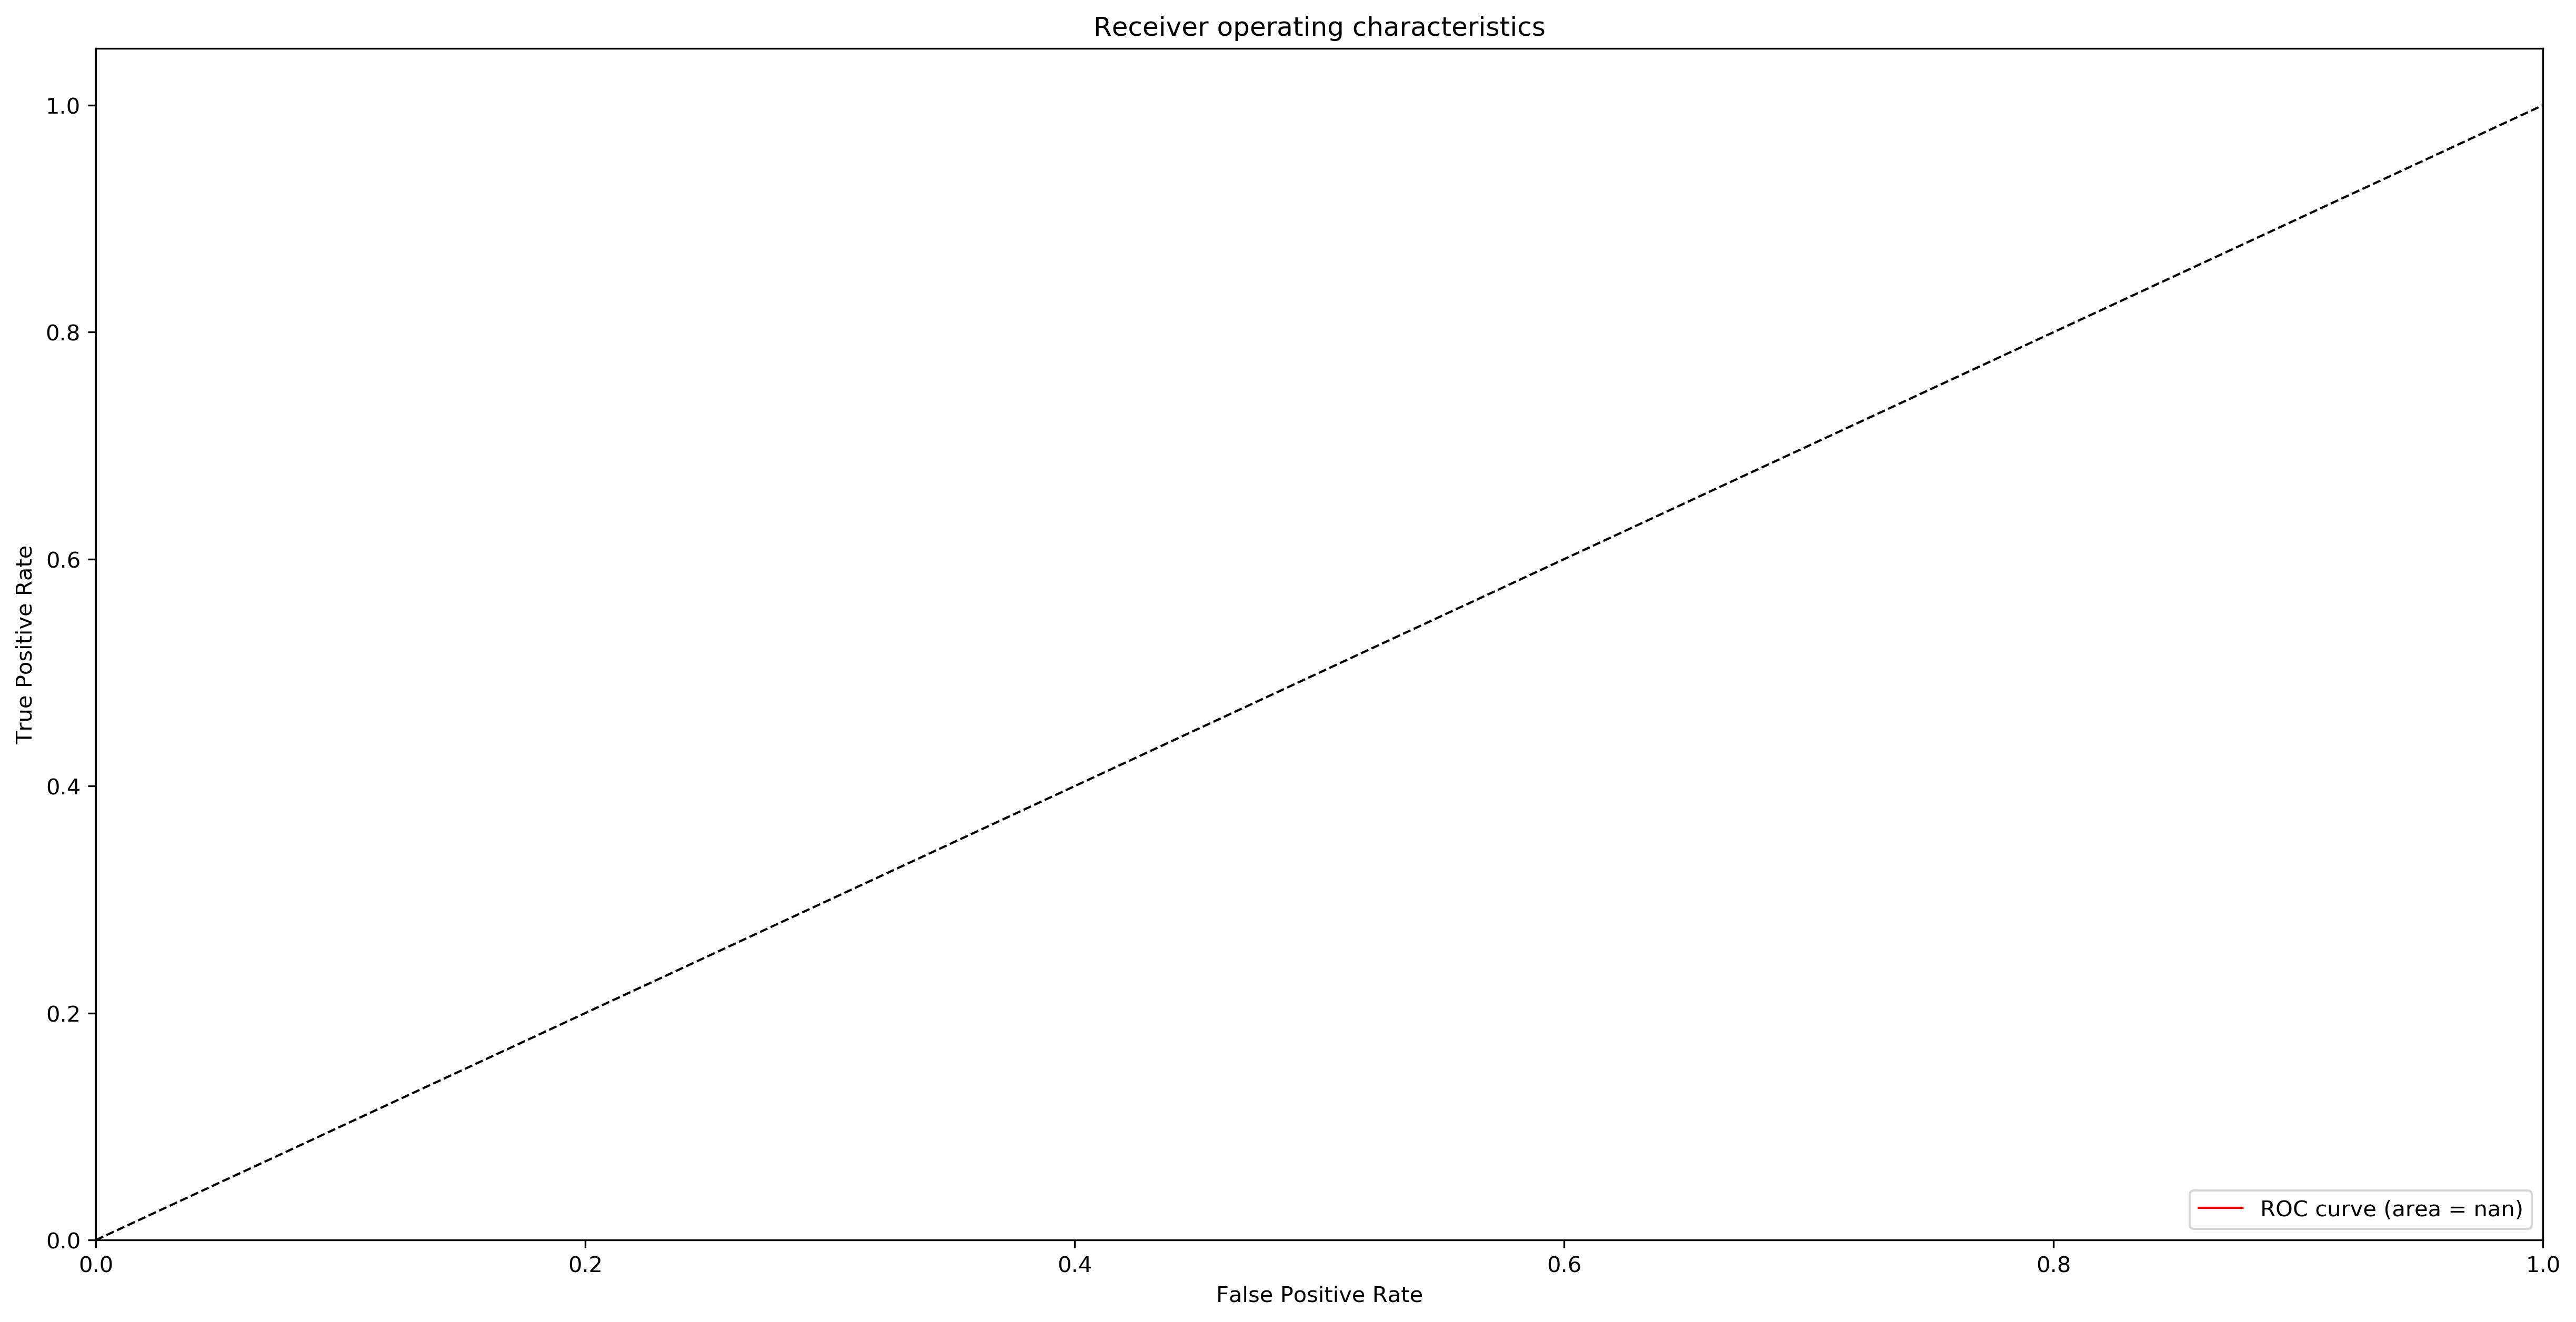

In [12]:
#predict on the validation data
X_test, Y_test = load_resized_validation_data(img_rows, img_cols)
print(X_test.shape, Y_test.shape)

# Make predictions
print('-'*30)
print('Predicting on the validation data...')
print('-'*30)
y_pred = model.predict(X_test, batch_size=batch_size, verbose=1)

# compute the accuracy
Test_accuracy = accuracy_score(Y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
print("Test_Accuracy = ",Test_accuracy)

#compute the ROC-AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Plot ROC curve for the positive class
plt.figure(figsize=(20,10), dpi=300)
lw = 1 #true class label
plt.plot(fpr[1], tpr[1], color='red',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()



In [13]:
## computhe the cross-entropy loss score
score = log_loss(Y_test,y_pred)
print(score)

## compute the average precision score
prec_score = average_precision_score(Y_test,y_pred)  
print(prec_score)

# transfer it back
y_pred = np.argmax(y_pred, axis=1)
Y_test = np.argmax(Y_test, axis=1)
print(y_pred.shape)
print(Y_test.shape)

np.savetxt('custom_model_y_pred.csv',y_pred,fmt='%i',delimiter = ",")
np.savetxt('custom_model_Y_test.csv',Y_test,fmt='%i',delimiter = ",")
#################compute confusion matrix######################################

#plot the confusion matrix
target_names = ['class 0(abnormal)', 'class 1(normal)']
print(classification_report(Y_test,y_pred,target_names=target_names))
print(confusion_matrix(Y_test,y_pred))
cnf_matrix = (confusion_matrix(Y_test,y_pred))
np.set_printoptions(precision=4)
plt.figure(figsize=(20,10), dpi=300)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                  title='Confusion matrix')
plt.show()
###############################################################################
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(20,10), dpi=300)
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(20,10), dpi=300)
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'])
#plt.style.use(['classic'])
plt.style.use(['classic'])
###############################################################################

0.0
nan
(5518,)
(5518,)


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:528: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [14]:
savedModelName = 'weights_and_model' + '-'+str(num_epoch)+'-FINAL.hdf5'
model.save(savedModelName)

import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file(savedModelName)
tflite_model = converter.convert()
tflitefilename = "weights"+"converted_model.tflite"
open(tflitefilename, "wb").write(tflite_model)




Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 10 variables.
INFO:tensorflow:Converted 10 variables to const ops.


1756340